# Twords 

This notebook will explain the structure of the Twords class and show how it can be used. 

The basic work flow is you search twitter for a particular search term, say "charisma", either with the Henrique code or with the Twitter API. (Note: for more obscure terms like "charisma", an API search may take upwards of a day or two to get a reasonable sized data set. The Henrique code would be much faster in these cases.) All the returned tweets are then put into a bag-of-words frequency analyzer to find the frequency of each word in collection of tweets. These frequencies are compared with the background frequencies of English words on twitter (there are several options for computing this background rate, see below) and the results displayed in order of which words are most disproportionately more frequently used with that search. 

E.g., if you search for "charisma", you will find that words like "great", "lacks", and "handsome" were roughly 20 times more likely to occur in tweets with the word "charisma" in it than in a random sample of all tweets. Twords creates a list of these disproportionately-used words, in order of how many times more likely they are to appear in tweets containing search term that otherwise. 

Once the frequency chart is found with the list of disproportionately used words, the user can search the tweet corpus for tweets containing one of these words to see what types of tweets had them. In the charisma example, it was found that "carpenter" was one of the most common words in these tweets, but a search in the tweet corpus revealed that a popular actress was named "charisma carpenter", so all tweets about her were included. Since this was not the sense that was intended, Twords lets the user delete tweets from the corpus by search term and re-do the frequency analysis. In this case, tweets containing the word "carpenter" were removed. (This would also remove a tweet that said something like "the carpenter I hired had great charisma", which we would probably want to include in the corpus, but this is a small price to pay to remove the many unwanted "charisma carpenter" tweets.) Another common use of this delete function is to remove spam - spam often consists of idential tweets coming simultaneously from several different accounts, which can produce noticeable (and probably undesired) frequency associations in the final bag-of-words analysis.

Main objects within Twords class: 

**data_path**: Path to twitter data collected with search_terms. Currently code is meant to read in data collected wtih Henrique twitter code. 

**background_path**: path to background twitter data used to compare word frequencies 

**search_terms**: list of terms used in twitter search to collect tweets located at data_path 

**tweets_df**: pandas dataframe that contains all tweets located at data_path, possibly with some tweets dropped (see  dropping methods below). If user needs to re-add tweets that were previously dropped they must reload all tweet data over again from the csv. 

**word_bag**: python list of words in all tweets contained in tweets_df

**freq_dist**: nltk.FreqDist() object computed on word_bag

**word_freq_dist**: pandas dataframe of frequencies of top words computed from freq_dist

## Note on background word frequencies 

If the search is done by the Twitter API, calculation of background word frequencies is straightforward with the sampling feature of the Twitter API. 

If the tweets are gathered using the Henrique search library (which queries twitter automatically through Twitter's web interface), background frequencies can be trickier, since the Henrique library can specify search dates. Search dates set a year or more in the past in principle require background rates for those past dates, which cannot be obtained with the Twitter API. To approximate these rates, a search was done using ~50 of the most common English words simultaneously. 

The other issue is the Java version of Henrique project returns Top tweets only (i.e., tweets that Twitter has determined have seen a lot of engagement with users) rather than all tweets. The background word rates between "Top tweets" and "All tweets" probably differs. 

A solution is to use all three background possibilities (current API background, Top tweets background w/ top 50 English search terms, and All tweets background with top 50 English search terms) and compare their word rates each other. In early versions of these tests the difference in word rates in background between Twitter API and Top tweets was typically less than factor of 2, which would make little difference in word rates comparison, as words of interest typically appeared ~10 or more times more frequently than base rate. 

# Example
Showing how program can work with some previously collected tweets. These were found by searching for "charisma" and "charismatic" using Henrique code. 

In [1]:
from twords import * 
%matplotlib inline

/Users/danieldandurand/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


First set path to desired twitter data location, collect tweets, lower case of all letters, and drop tweets where the strings "charisma" or "charismatic" are contained in either a username or a mention. 

In [2]:
twit = Twords()
twit.set_Data_path("/Volumes/LaCie/twitter/charisma_300000")
twit.set_Background_path('freq_table_72319443_total_words_twitter_corpus.csv')
twit.create_Background_dict()
twit.set_Search_terms(["charisma"])

In [3]:
twit.get_java_tweets_from_csv_list()

In [6]:
twit.lower_tweets()
twit.drop_by_search_in_name()

Create the word bag and then the nltk object from the tweets in tweets_df. 

In [7]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag(twit.word_bag)

Time to compute word bag:  1.09427538315 minutes


Create dataframe showing the most common words in the tweets and plot the results. 

In [8]:
twit.top_word_frequency_dataframe(200)

twords.py:626: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if word in self.background_dict.keys():


In [9]:
twit.word_freq_df.sort_values("log relative frequency", ascending = True, inplace = True)

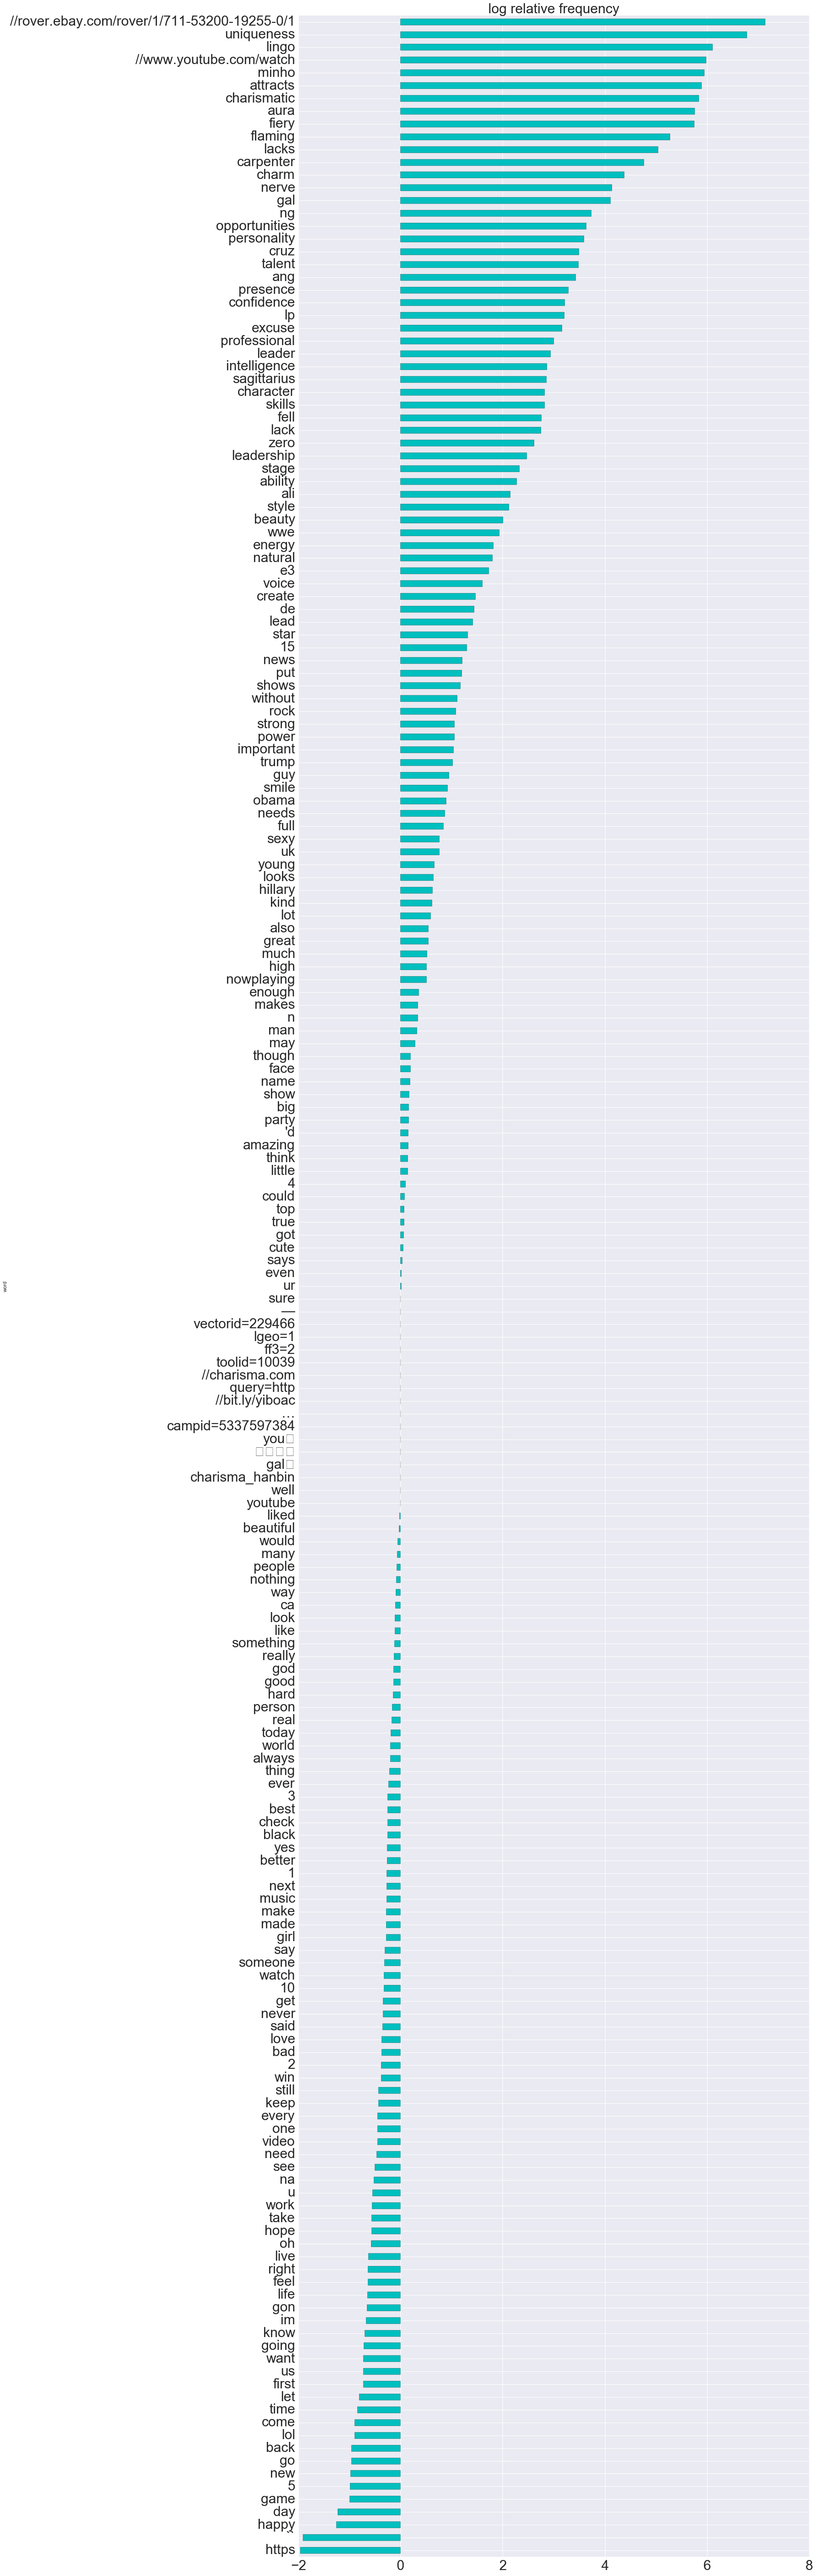

In [10]:
twit.plot_word_frequencies("log relative frequency")

## Find which users are contributing disproportionately to results 
with twit.tweets_df['username'].value_counts(), which returns a list of the users with highest number of tweets in descending order. These results can be plotted using something like twit.tweets_df['username'].value_counts().iloc[:0].plot.barh()

In [ ]:
twit.tweets_df["username"].value_counts()

In [ ]:
twit.drop_by_term_in_name("hope4siblings")

In [ ]:
charisma_pd = pd.read_csv("charisma_test_file.csv")

Spam words related to urls or punctuation can also be added to the list of stop words in the Twords code. 

In [ ]:
twit.tweets_containing("minho")

We can see some evidence of spam already, so let's look at some of the tweets containing the string "www.inc.com/jeff", which is piece of the apparently spammy url we see above. 

In [ ]:
twit.tweets_containing("minho")

In [ ]:
len(twit.tweets_df)

We clearly want to drop these tweets, so let's use the drop function:

In [ ]:
twit.drop_by_term_in_tweet(["minho"])

This drop occurs on the tweets_df dataframe, so we need to recreate the word bag and the nltk object to update our analysis: 

In [ ]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag(twit.word_bag)

In [ ]:
twit.top_word_frequency_dataframe(100).sort_values()
twit.plot_word_frequencies("relative frequency")

"excuse" is an interesting word to have in our list, let's look at some examples of its use. 

In [ ]:
twit.tweets_containing("excuse")

It appears these tweets are mainly quoting lil wayne - we'll remove these as well and recalculate statistics. 

In [ ]:
twit.drop_by_term_in_tweet(["excuse"])
twit.create_word_bag()
twit.make_nltk_object_from_word_bag(twit.word_bag)

In [ ]:
twit.top_word_frequency_dataframe(50)
twit.plot_word_frequencies()

We can continue this process to iteratively remove spam and find the interested word associations we desire. One example of an association we are interested in is "leader": 

In [ ]:
twit.tweets_containing("leader")[:50]